# NLP Tutorial Using LSTM and RNNS

NLP is commonaly used to do predictions and work with textual inputs.Natural Language Processing powers everything from chatbots to search engines, and is used in diverse tasks like sentiment analysis and machine translation.

Deep learning is the new champion when it comes to machine learning. Recurrent neural network is a type Reinforcement learning which is particulary newer but equally powerfull.  

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [9]:
traning_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

print(traning_data.head())
print(testing_data.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
max_len = 1000

# Tokenisation

A machine cannot understand english , so we must convert to machine readable format. We can convert a sentence into an array of words or tokens this is called text segmentation.

In [11]:
from nltk.corpus import stopwords

In [12]:
def Perform_Tfid_To(Data) :
    tfidf_vectorizer = TfidfVectorizer(sublinear_tf = False, use_idf = False, strip_accents='ascii' ,stop_words='english',max_features=max_len)
    Tfidf_testing_data = tfidf_vectorizer.fit_transform(Data)
    tfidf_vectorizer.get_feature_names()
    
    return [tfidf_vectorizer ,Tfidf_testing_data ]

Perform_Tfid_To(traning_data["text"])

[TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.float64'>, encoding='utf-8',
                 input='content', lowercase=True, max_df=1.0, max_features=1000,
                 min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                 smooth_idf=True, stop_words='english', strip_accents='ascii',
                 sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                 tokenizer=None, use_idf=False, vocabulary=None),
 <7613x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 37024 stored elements in Compressed Sparse Row format>]

# Cleaning the data

Since out data contains certain non-alphabetical characters , It is encouraged to clean the data using certain text filterations techniques.

In [13]:
import re
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup

In [14]:
def remove_html_data(text):
    soup = BeautifulSoup(text,"html.parser")
    return soup.get_text()

def remove_square_brackets(text):
    return re.sub('\[[^]]*\]', '',text)


def remove_punctuations(text):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in symbols:
        text = np.char.replace(text, i, ' ')
    return text

Forest fire near La Ronge Sask. Canada

In [15]:

for i in range(traning_data["text"].shape[0]):
    traning_data["text"][i] = remove_html_data(traning_data["text"][i])
    traning_data["text"][i] = remove_square_brackets(traning_data["text"][i])  

/Users/rohanchopra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rohanchopra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
[tfid_vector , tfid_data] = Perform_Tfid_To(traning_data["text"])
features = tfid_vector.get_feature_names()

dense = tfid_data.todense()
dense_list = dense.tolist()

DataFrame = pd.DataFrame(dense_list,columns=features)


tfidf_vector_X = tfid_data.toarray() 
tfidf_vector_X = tfidf_vector_X[:, :]

tfidf_vector_y = traning_data.target

le = LabelEncoder()
tfidf_vector_y = le.fit_transform(tfidf_vector_y)
tfidf_vector_y = tfidf_vector_y.reshape(-1,1)


X_train,X_test,Y_train,Y_test = train_test_split(traning_data["text"],tfidf_vector_y,test_size=0.15)

print(tfidf_vector_y.shape)

(7613, 1)


In [17]:
traning_data.drop(['keyword','location' ,'id'],axis=1,inplace=True)

Text(0.5, 1.0, 'Number of O and 1')

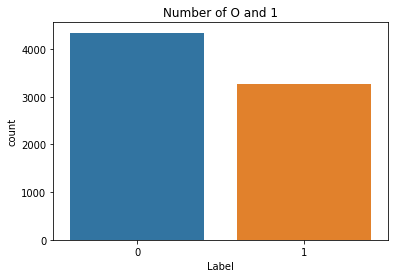

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(traning_data.target)
plt.xlabel('Label')
plt.title('Number of O and 1')


# RNN Model

This creates a RNN model , trains it and calculates the accuracy.

In [19]:
max_words = 3000
max_len = 400
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)


def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(300,name='FC1')(layer)
    layer = Activation('relu')(layer)
    
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [20]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 400)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 400, 50)           150000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 300)               19500     
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 301 

In [23]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=5,
          validation_split=0.2)

Train on 5176 samples, validate on 1295 samples
Epoch 1/5
5176/5176 [==============================] - 23s 4ms/step - loss: 0.3393 - accuracy: 0.8963 - val_loss: 0.7332 - val_accuracy: 0.7668
Epoch 2/5
5176/5176 [==============================] - 23s 4ms/step - loss: 0.1539 - accuracy: 0.9438 - val_loss: 0.8173 - val_accuracy: 0.7645
Epoch 3/5
5176/5176 [==============================] - 25s 5ms/step - loss: 0.1402 - accuracy: 0.9490 - val_loss: 0.9239 - val_accuracy: 0.7714
Epoch 4/5
5176/5176 [==============================] - 23s 4ms/step - loss: 0.1397 - accuracy: 0.9498 - val_loss: 0.9165 - val_accuracy: 0.7591
Epoch 5/5
5176/5176 [==============================] - 23s 4ms/step - loss: 0.1191 - accuracy: 0.9556 - val_loss: 0.9286 - val_accuracy: 0.7583


In [24]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1142/1142 [==============================] - 2s 2ms/step
Test set
  Loss: 0.811
  Accuracy: 0.767
